In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


#Creating dataset

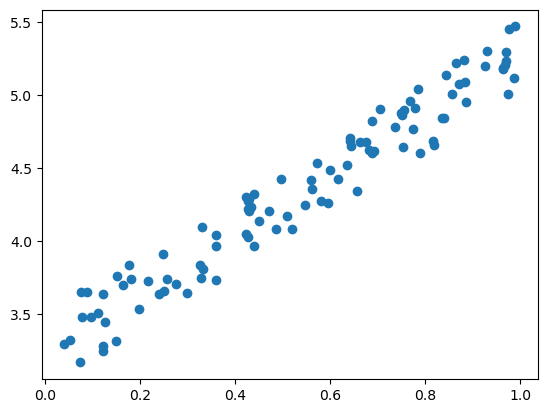

In [2]:
n = 100
eps = 0.5
a = 2
b = 3
x = np.random.rand(n) 
y = a*x + b + eps * np.random.rand(n)
plt.scatter(x, y)
plt.show()

In [3]:
X = np.array(list(zip(x,y)))

#Normalizing data

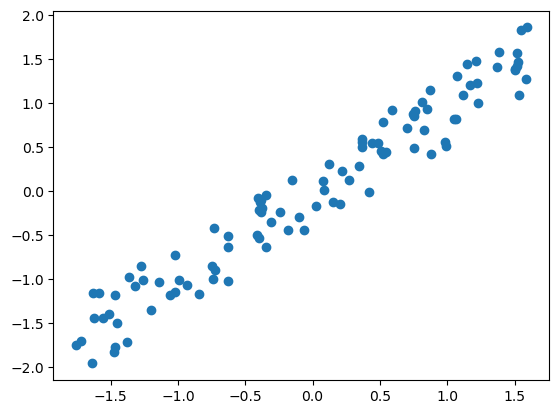

In [4]:
mu = np.mean(X, axis=0)
std = np.sqrt(np.mean((X-mu)**2, axis=0))
X_norm = (X - mu) / std
plt.scatter(X_norm[:,0], X_norm[:, 1])
plt.show()


# Perform PCA


In [5]:
pca = PCA(n_components=1)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

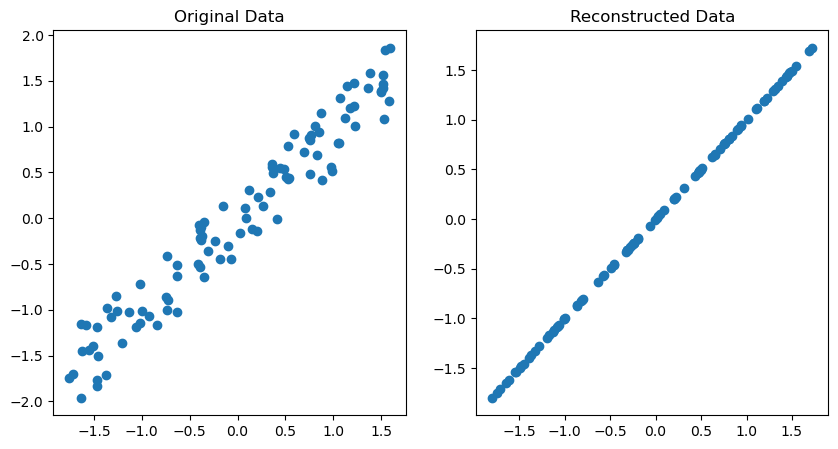

In [6]:
# Reconstruct the data using only the first principal component
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize the original data and the reconstructed data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_norm[:, 0], X_norm[:, 1])
axs[0].set_title("Original Data")
axs[1].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1])
axs[1].set_title("Reconstructed Data")
plt.show()

Homework: Reduce the dimensionality of parrot picture from 3 

---

to 2 then reconstruct and show the image

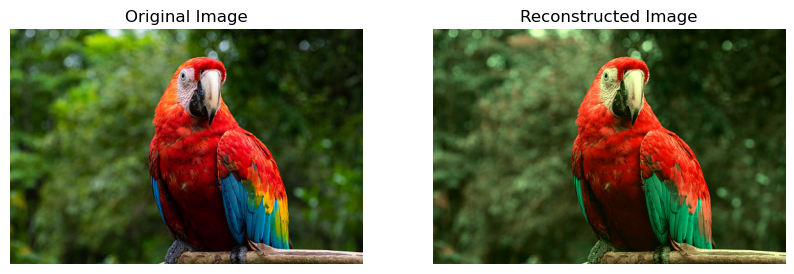

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

image_path = 'parrot.jpeg'
image = Image.open(image_path)
img_array = np.array(image)

pixels = img_array.reshape(-1, 3)

pca = PCA(n_components=2)
pixels_pca = pca.fit_transform(pixels)

# Reconstruct the image using the inverse transform
pixels_reconstructed = pca.inverse_transform(pixels_pca)
pixels_reconstructed = np.clip(pixels_reconstructed, 0, 255).astype('uint8')
image_reconstructed = pixels_reconstructed.reshape(img_array.shape[0], img_array.shape[1], 3)

# Display the original and reconstructed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_array)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(image_reconstructed)
axs[1].set_title("Reconstructed Image")
axs[1].axis('off')

plt.show()
